In [19]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

#from pathlib import Path


In [2]:


#data_df = Path("Resources/us_states_covid19_daily.csv")

data_df = pd.read_csv("Resources/us_states_covid19_daily.csv")
data_df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [3]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         15633 non-null  int64  
 1   state                        15633 non-null  object 
 2   positive                     15481 non-null  float64
 3   probableCases                5449 non-null   float64
 4   negative                     15323 non-null  float64
 5   pending                      1684 non-null   float64
 6   totalTestResultsSource       15633 non-null  object 
 7   totalTestResults             15598 non-null  float64
 8   hospitalizedCurrently        12516 non-null  float64
 9   hospitalizedCumulative       9434 non-null   float64
 10  inIcuCurrently               7713 non-null   float64
 11  inIcuCumulative              2700 non-null   float64
 12  onVentilatorCurrently        6211 non-null   float64
 13  onVentilatorCumu

In [4]:
data_df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

In [5]:
daily_data = pd.read_csv("Resources/us_covid19_daily.csv")

daily_data

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResults,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20201206,56,14534035,161986294,13592.0,101487.0,585676.0,20145.0,31946.0,7094.0,...,204063869,2020-12-06T24:00:00Z,0,0,1138,2256,1172590,176771,1634532,9cf16504f91958e803a2197daf8c2528a4eddc18
1,20201205,56,14357264,160813704,13433.0,101190.0,583420.0,19950.0,31831.0,7005.0,...,202429337,2020-12-05T24:00:00Z,0,0,2445,3316,1526995,211073,2169756,6249216c5f097c94ce33a811dab011a483a42404
2,20201204,56,14146191,159286709,12714.0,101276.0,580104.0,19858.0,31608.0,6999.0,...,200259581,2020-12-04T24:00:00Z,0,0,2563,4652,1260657,224831,1854869,ae30ea088584335ba4d57ee927f8dbda6add74db
3,20201203,56,13921360,158026052,15106.0,100755.0,575452.0,19723.0,31276.0,6867.0,...,198404712,2020-12-03T24:00:00Z,0,0,2706,5331,1238465,210204,1828230,0f253d185ecb336cdd18a4c61996eda1b7eef13b
4,20201202,56,13711156,156787587,14368.0,100322.0,570121.0,19680.0,31038.0,6855.0,...,196576482,2020-12-02T24:00:00Z,0,0,2733,5028,982032,195796,1459202,477c17b6302d0485195e77ecf8270a974f7a3c82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,20200126,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-26T24:00:00Z,0,0,0,0,0,0,0,69c67c81e64d10a5270497fc5336779c06fb812b
316,20200125,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-25T24:00:00Z,0,0,0,0,0,0,0,9ea5731f5b0a79617b994d6842eecfdbeb1dde35
317,20200124,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-24T24:00:00Z,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b
318,20200123,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981


In [28]:
counties_data = pd.read_csv("Resources/us_counties_covid19_daily.csv")
counties_data 
# counties_data["deaths"] = counties_data["deaths"].map("{:,.2f}".format)
# counties_data

#this was for debugging 
counties_Data_state = counties_data[counties_data['state']== 'New York']
death_sum_state = counties_Data_state.groupby('state')['deaths'].sum().reset_index()
death_sum_state


,state,deaths
0,New York,7386720.0


In [7]:

# merging states and daily together 

# merge_data = pd.merge(data_df,daily_data,on="date")
# merge_data

# I think i did something wrong here if you look at deathIncrease_y the value are the same 
# so merging them is not a good idea.  



In [8]:
# clean_data = merge_data.drop(['totalTestResultsSource', 'lastModified', 'hash_y'], axis=1)
# clean_data


In [9]:

counties_data.info()
counties_clean = counties_data.fillna(0)

counties_clean['cases'] = counties_clean['cases'].astype(int)
counties_clean['deaths'] = counties_clean['deaths'].astype(int)
print(counties_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB
              date      county       state     fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0      1       0
1       2020-01-22   Snohomish  Washington  53061.0      1       0
2       2020-01-23   Snohomish  Washington  53061.0      1       0
3       2020-01-24        Cook    Illinois  17031.0      1       0
4       2020-01-24   Snohomish  Washington  53061.0      1       0
...            ...         ...         ...      ...    ...     ...
800432  2020-12-05  Sweetwater     Wyoming  56037.0   

In [10]:
# clean_data = clean_data.fillna(0)
# clean_data


In [46]:
death_sum = counties_clean.groupby('state')['deaths'].sum().reset_index()
death_avg = counties_clean.groupby('state')['deaths'].mean().reset_index()

case_avg = counties_clean.groupby('state')['cases'].mean().reset_index()
case_sum = counties_clean.groupby('state')['cases'].sum().reset_index()
#hospitalized = data_df.groupby('state')['hospitalizedCumulative'].sum().reset_index()

#hospitalizedIncrease = data_df.groupby('state')['hospitalizedIncrease'].sum().reset_index()

state_avg = pd.merge(death_avg,case_avg, on="state")
state_deaths_cases_avg = pd.DataFrame(state_avg)
state_deaths_cases_avg_sort = state_deaths_cases_avg.sort_values("deaths")
#df = pd.merge(hospitalized,hospitalizedIncrease, on="state")

deaths_cases_sum = pd.merge(death_sum,case_sum, on="state")
# feel free to explore before we start graphing.
total_death_cases = pd.DataFrame(deaths_cases_sum)
total_death_sort = total_death_cases.sort_values("deaths", ascending = False)
total_death_sort.head()
#counties_data.describe()


    
## top five state total death

,state,deaths,cases
33,New York,7386720,104506668
31,New Jersey,3345732,46321719
4,California,2479213,127488272
46,Texas,2261900,119483867
9,Florida,2101392,107316623


In [33]:
total_death_sort.tail()
# last five state total death

,state,deaths,cases
54,Wyoming,11733,1527256
1,Alaska,8638,1747498
11,Guam,7319,657603
49,Virgin Islands,2905,167784
36,Northern Mariana Islands,492,12485


In [31]:
# death_sum = counties_clean.groupby('state')['deaths'].sum().reset_index
# death_sum

In [38]:
top_avg_death = state_avg.sort_values("deaths", ascending = False)
top_avg_death.head()

# top average death rate base on cases

,state,deaths,cases
31,New Jersey,568.132450,7865.803872
33,New York,482.792157,6830.501176
22,Massachusetts,473.491120,7211.012087
8,District of Columbia,464.525547,10823.456204
6,Connecticut,410.430737,5491.523789


In [39]:
top_avg_death.tail()

,state,deaths,cases
49,Virgin Islands,3.366165,194.419467
27,Montana,3.231878,268.692362
54,Wyoming,2.035919,265.010585
1,Alaska,1.451033,293.549135
36,Northern Mariana Islands,1.128440,28.635321


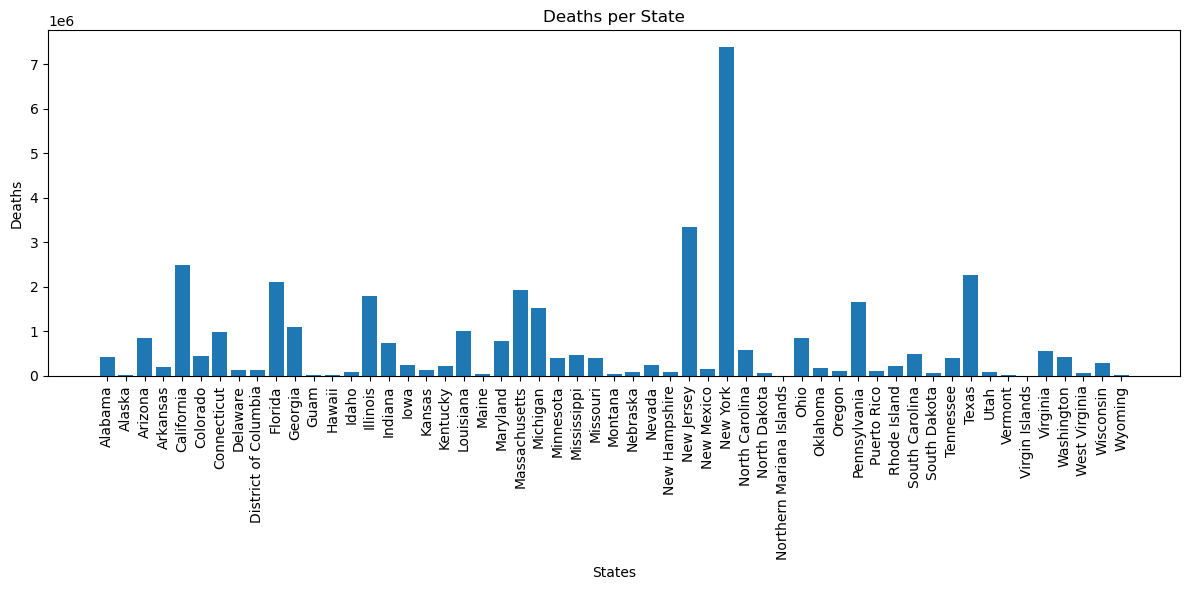

In [42]:
plt.figure(figsize=(12, 6)) 
plt.bar(total_death_cases['state'], total_death_cases['deaths'])
plt.xlabel('States')
plt.ylabel('Deaths')
plt.title('Deaths per State')
plt.xticks(rotation='vertical')
plt.tight_layout()  
plt.show()

The r-value is: 0.7702188299909039


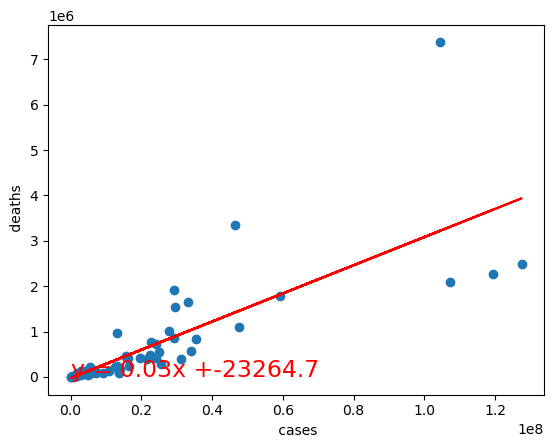

In [50]:
x_values = total_death_cases["cases"]
y_values= total_death_cases["deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"-r")
plt.xlabel(" cases")
plt.ylabel(" deaths")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

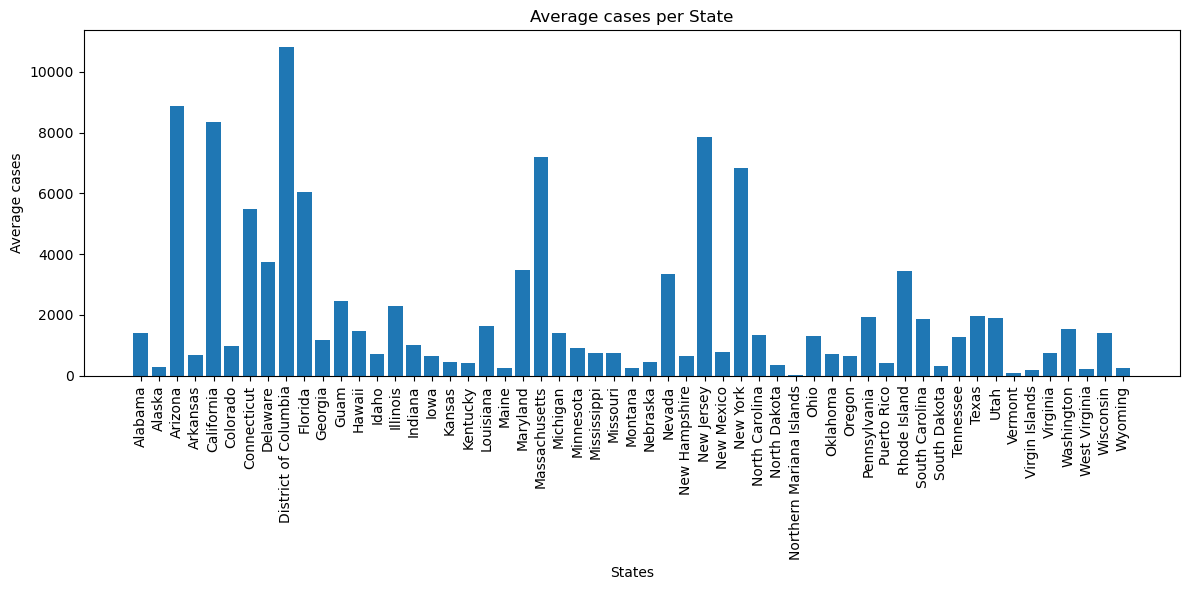

In [47]:
plt.figure(figsize=(12, 6)) 
plt.bar(state_deaths_cases_avg['state'], state_deaths_cases_avg['cases'])
plt.xlabel('States')
plt.ylabel('Average cases')
plt.title('Average cases per State')
plt.xticks(rotation='vertical')  
plt.tight_layout() 
plt.show()

The r-value is: 0.8624335744217406


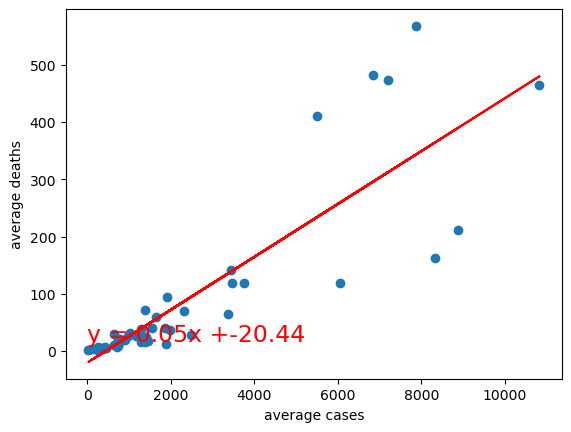

In [18]:
x_values = state_avg["cases"]
y_values= state_avg["deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"-r")
plt.xlabel("average cases")
plt.ylabel("average deaths")
plt.annotate(line_eq,(0,17), fontsize=17, color="red")
print(f"The r-value is: {rvalue}")

# Analysis
